# <---   Zomato Data Analysis Project   --->

## Step-1 Importing Libraries

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import numpy as np
import warnings 
warnings.filterwarnings("ignore")

## Step-2 Loading DataSet

In [40]:
df=pd.read_csv("zomato-data.csv")

## Step-3 Basic Data Inspection

In [41]:
df.head(3)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet


In [42]:
df.shape

(148, 7)

In [43]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   name                         148 non-null    str  
 1   online_order                 148 non-null    str  
 2   book_table                   148 non-null    str  
 3   rate                         148 non-null    str  
 4   votes                        148 non-null    int64
 5   approx_cost(for two people)  148 non-null    int64
 6   listed_in(type)              148 non-null    str  
dtypes: int64(2), str(5)
memory usage: 8.2 KB


In [44]:
df.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


## Step-4 Data Cleaning

### Convert the Data Type and Transformation of column - rate

In [45]:
def HandleRate(value):
    value=str(value).split("/")
    value=value[0]
    return float(value)

In [46]:
df["rate"]=df["rate"].apply(HandleRate)

In [47]:
df.tail()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining
147,Vijayalakshmi,Yes,No,3.9,47,200,Dining


In [48]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    str    
 1   online_order                 148 non-null    str    
 2   book_table                   148 non-null    str    
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    str    
dtypes: float64(1), int64(2), str(4)
memory usage: 8.2 KB


## Step-5 Data Analysis

### Q-1 What type of restaurant do the majority of customers order from?

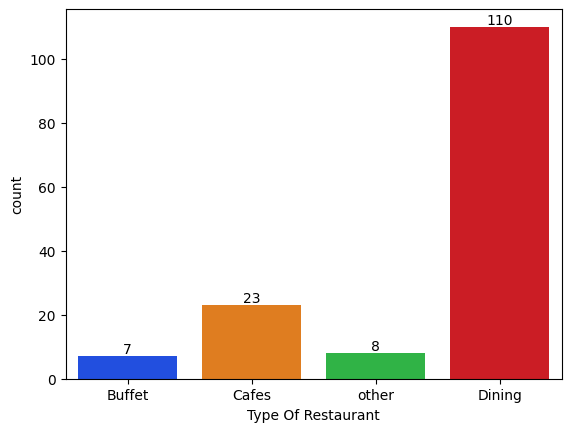

In [49]:
ax=sns.countplot(x=df["listed_in(type)"],palette="bright")
plt.xlabel("Type Of Restaurant")
plt.savefig("first.jpeg",facecolor="auto",pad_inches=0.1,bbox_inches="tight")
for container in ax.containers:
    ax.bar_label(container)
plt.show()

### Conlusion - Majority of retaurant type falls in dining category

## Q-2 How many votes has each type of restaurant received from customers?

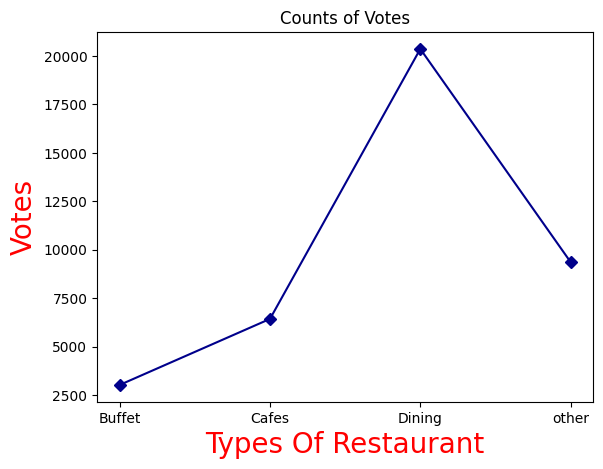

In [50]:
gb=df.groupby(["listed_in(type)"])["votes"].sum()

plt.plot(gb,marker="D",c="darkblue")
plt.xlabel("Types Of Restaurant",c="red",size=20)
plt.ylabel("Votes",c="red",size=20)
plt.title("Counts of Votes")
plt.savefig("second.jpeg",facecolor="auto",pad_inches=0.1,bbox_inches="tight")

plt.show()

### Conclusion - Dining Restaurants has received maximum Votes

## Q-3 What are the ratings that the majority of restaurent received from customers?

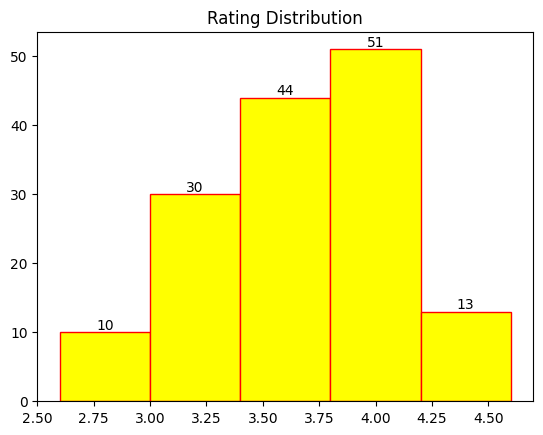

In [51]:
counts,edge, bars= plt.hist(x=df["rate"],bins=5,edgecolor="red",color="yellow")
plt.title("Rating Distribution")
plt.savefig("third.jpeg",facecolor="auto",pad_inches=0.1,bbox_inches="tight")
plt.bar_label(bars)
plt.show()

### Conclusion - The Majority of Restaurants Received Ratings from 3.5 to 4.0

## Q-4 Zomato has ovserved that most couples order most of their food online. What is their average spending on each order?

In [52]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


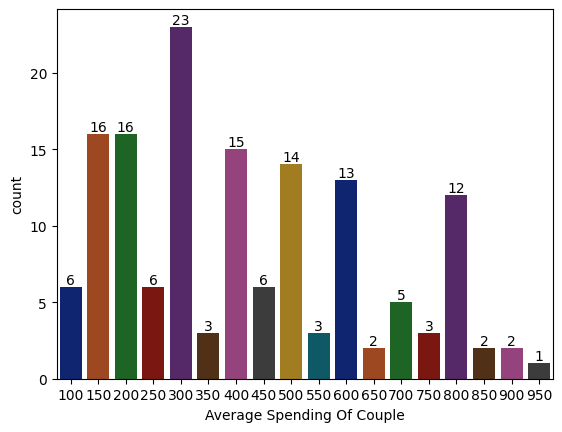

In [53]:
couple_data=df["approx_cost(for two people)"]
ax=sns.countplot(x=couple_data,legend=False,palette="dark")
plt.xlabel("Average Spending Of Couple")
plt.savefig("fourth.jpeg",facecolor="auto",pad_inches=0.1,bbox_inches="tight")
for container in ax.containers:
    plt.bar_label(container)
plt.show()

### Conclusion - The Majority of couple prefer restaurant with an approximate spending cost of 300 rupees

## Q-5- Which Mode (Online Or Offline) Has Received Maximum Ratings?

In [54]:
df.head(3)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet


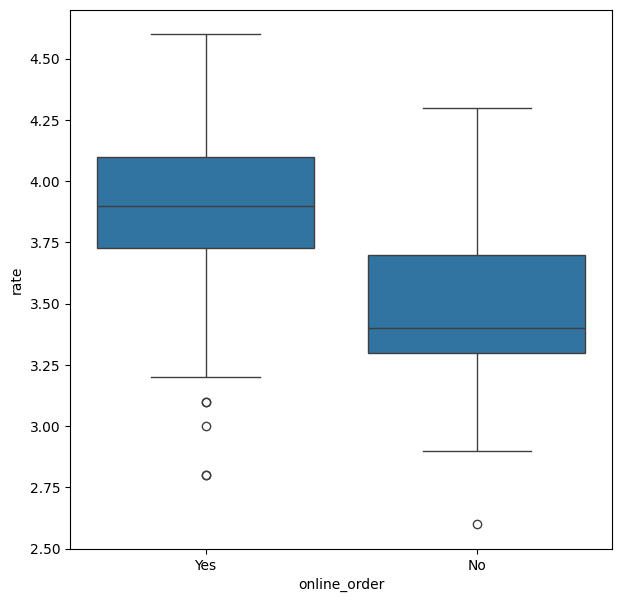

In [55]:
plt.figure(figsize=(7,7))
sns.boxplot(x="online_order",y="rate",data=df)
plt.savefig("fifth.jpeg",facecolor="auto",pad_inches=0.1,bbox_inches="tight")
plt.show()

### Conclusion - Offline order has received lower ratings in comparison of online order

## Q-6 Which type of restaurant received more offline orders, so that zomato can provide those customers with some good offers?

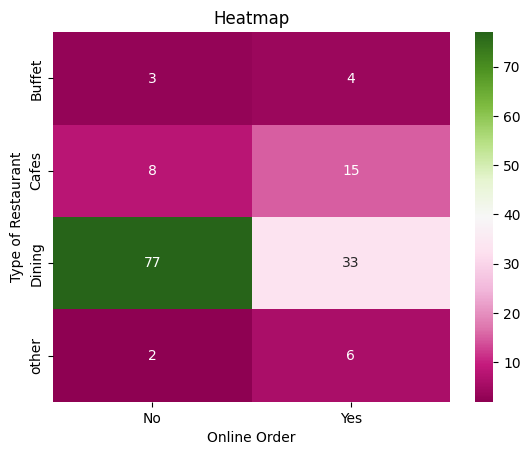

In [56]:
pt=df.pivot_table(index="listed_in(type)",columns="online_order",aggfunc="size",fill_value=0)
sns.heatmap(pt,annot=True,fmt="d",cmap="PiYG")
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Type of Restaurant")
plt.savefig("six.jpeg",facecolor="auto",pad_inches=0.1,bbox_inches="tight")
plt.show()

# CONCLUSION - Dining restaurant accept primarily offline orders, wheres cafes primarily receive online orders. This suggest client prefers in person at restaurant, but prefers onlining ordering at cafes.